In [1]:
# !unzip imagepython.zip

In [2]:
import os
os.getcwd()
os.chdir('./imagepython/python')
os.listdir()

['asr_bgm_aksk_demo.py',
 'asr_bgm_token_demo.py',
 'asr_bgm_token_with_proxy_demo.py',
 'celebrity_recognition_aksk_demo.py',
 'celebrity_recognition_token_demo.py',
 'dark_enhance_aksk_demo.py',
 'dark_enhance_token_demo.py',
 'data',
 'image_defog_aksk_demo.py',
 'image_defog_token_demo.py',
 'image_sdk',
 'image_tagging_aksk_demo.py',
 'image_tagging_token_demo.py',
 'label',
 'README.md',
 'recapture_detect_aksk_demo.py',
 'recapture_detect_token_demo.py',
 'super_resolution_aksk_demo.py',
 'super_resolution_token_demo.py',
 '__init__.py']

In [3]:
# 调用包从图像识别包中调用，图像标签,工具包
from image_sdk.utils import encode_to_base64
from image_sdk.image_tagging import image_tagging_aksk
from image_sdk.utils import init_global_env

# 调用json解析传回的结果
import json
# 操作系统文件/文件夹的包
import os
import shutil
# 图像处理展示相关的包

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [4]:
init_global_env('cn-north-4')

# 准备ak,sk
app_key = '1DZ0WPP0NFBFVZYUPGSP'  
app_secret = 'wnHCLIUC0xhx3qsOFfewLK4s2rwi3LOropFI7gLp'


In [5]:
# 使用网络图像测试
demo_data_url = 'https://sdk-obs-source-save.obs.cn-north-4.myhuaweicloud.com/tagging-normal.jpg'
# call interface use the url
result = image_tagging_aksk(app_key, app_secret, '', demo_data_url, 'zh', 5, 30)

# 转化成Python字典形式
tags = json.loads(result)
print(tags)


{'result': {'tags': [{'confidence': '98.5', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '97.13', 'i18n_tag': {'en': 'Children', 'zh': '儿童'}, 'tag': '儿童', 'type': 'object'}, {'confidence': '96.19', 'i18n_tag': {'en': 'Sandbox', 'zh': '(供儿童玩的)沙坑'}, 'tag': '(供儿童玩的)沙坑', 'type': 'scene'}, {'confidence': '89.31', 'i18n_tag': {'en': 'Play', 'zh': '玩耍'}, 'tag': '玩耍', 'type': 'object'}, {'confidence': '87.96', 'i18n_tag': {'en': 'Toy', 'zh': '玩具'}, 'tag': '玩具', 'type': 'object'}]}}


In [6]:
# 确定电子相册位置
file_path ='data/'
file_name = 'defog-demo.png'

# 保存图片标签的字典
labels={}

# 图像打标
result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + file_name), '', 'zh', 5, 60)
# 解析结果
result_dic = json.loads(result)
# 保存到字典中
labels[file_name] = result_dic['result']['tags']
print(labels)


{'defog-demo.png': [{'confidence': '98.43', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '87.19', 'i18n_tag': {'en': 'Campus', 'zh': '校园'}, 'tag': '校园', 'type': 'object'}, {'confidence': '84.03', 'i18n_tag': {'en': 'Character', 'zh': '人物'}, 'tag': '人物', 'type': 'object'}, {'confidence': '76.44', 'i18n_tag': {'en': 'Autumn', 'zh': '秋天'}, 'tag': '秋天', 'type': 'object'}, {'confidence': '76.14', 'i18n_tag': {'en': 'Scenery', 'zh': '风景'}, 'tag': '风景', 'type': 'object'}]}


In [7]:
# 确定电子相册位置
file_path ='data/'
# 保存图片标签的字典
labels = {}

items = os.listdir(file_path)
for i in items:
    # 判断是否为文件，而不是文件夹
    if os.path.isfile:
        # 华为云EI目前支持JPG/PNG/BMP格式的图片
        if i.endswith('jpg') or i.endswith('jpeg') or i.endswith('bmp') or i.endswith('png'):
            # 为图片打上标签
            result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + i), '', 'zh', 5, 60)
            # 解析返回的结果
            result_dic = json.loads(result)
            # 将文件名与图片对齐
            labels[i] = result_dic['result']['tags']

# 显示结果
print(labels)


{'celebrity-recognition.jpg': [{'confidence': '98.93', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '98.38', 'i18n_tag': {'en': 'Human face', 'zh': '人脸'}, 'tag': '人脸', 'type': 'object'}, {'confidence': '92.05', 'i18n_tag': {'en': 'Portrait', 'zh': '肖像'}, 'tag': '肖像', 'type': 'object'}, {'confidence': '90.45', 'i18n_tag': {'en': 'Art', 'zh': '艺术'}, 'tag': '艺术', 'type': 'object'}, {'confidence': '84.43', 'i18n_tag': {'en': 'Picture', 'zh': '图片'}, 'tag': '图片', 'type': 'object'}], 'dark-enhance-demo.bmp': [{'confidence': '78.6', 'i18n_tag': {'en': 'Building', 'zh': '建筑'}, 'tag': '建筑', 'type': 'object'}, {'confidence': '62.95', 'i18n_tag': {'en': 'Light and shadow', 'zh': '光影'}, 'tag': '光影', 'type': 'object'}, {'confidence': '62.64', 'i18n_tag': {'en': 'Indoor', 'zh': '室内'}, 'tag': '室内', 'type': 'object'}, {'confidence': '60.11', 'i18n_tag': {'en': 'Decorate', 'zh': '装饰'}, 'tag': '装饰', 'type': 'object'}], 'defog-demo.png': [{'confidence': '98.43', '

In [8]:
#将标签字典保存到文件
save_path = './label'
# 如果文件夹不存在则创建文件
if not os.path.exists(save_path):
    os.mkdir(save_path)

# 创建文件,执行写入操作，并关闭
with open(save_path + '/labels.json', 'w+') as f:
    f.write(json.dumps(labels))


In [9]:
# 打开刚刚保存的文件
label_path = 'label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)


In [10]:
# 搜索关键词
key_word = input('请输入搜索词')
# 设置可信百分比
threshold = 60
# 设置一个集合（集合内只存在唯一的元素）
valid_list = set()

# 遍历labels中的字典获取所有包含关键字的图片名字
for k,v in labels.items():
    for item in v:
        if key_word in item['tag'] and float(item['confidence']) >= threshold:
            valid_list.add(k)
            
            
# 展示结果            
valid_list = list(valid_list)
print(valid_list)


请输入搜索词人物
['defog-demo.png']


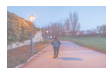

In [11]:
# 设置画布大小
plt.figure(24)

# 将每张图片依次排列到画布上
for k,v in enumerate(valid_list[:9]):
    pic_path = 'data/' + v
    img = Image.open(pic_path)
    img = img.resize((640,400))
    plt.subplot(331 + k)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [12]:
# 生成一个临时文件夹
if not os.path.exists('tmp'):
    os.mkdir('tmp')

# 将所有搜索到的图像转化为gif格式，并存储在临时文件夹中
gif_list = []
for k, pic in enumerate(valid_list):
    pic_path = 'data/' + pic
    img = Image.open(pic_path)
    img = img.resize((640,380))
    save_name = 'tmp/'+ str(k) + '.gif'
    img.save(save_name)
    gif_list.append(save_name)

# 打开已经所有静止的gif图片
images=[]
for i in gif_list:
    pic_path =  i
    images.append(Image.open(pic_path))

# 存储成动图gif
images[0].save('相册动图.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,
               loop=0)

# 释放内存
del images
# 删除临时文件夹
shutil.rmtree('tmp')

print('gif相册制作完成')


gif相册制作完成


In [13]:
# 打开保存的labels文件
label_path = 'label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)
print(labels)

# 获取置信度最高的文件分类
classes =[[v[0]['tag'],k] for k, v in labels.items()]
classes


for cls in classes:
    if not os.path.exists('data/' + cls[0]):
        os.mkdir('data/'+ cls[0])
    # 复制被对应的图片
    shutil.copy('data/'+ cls[1], 'data/'+ cls[0]+ '/' + cls[1])

print('已完成移复制!')


{'celebrity-recognition.jpg': [{'confidence': '98.93', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '98.38', 'i18n_tag': {'en': 'Human face', 'zh': '人脸'}, 'tag': '人脸', 'type': 'object'}, {'confidence': '92.05', 'i18n_tag': {'en': 'Portrait', 'zh': '肖像'}, 'tag': '肖像', 'type': 'object'}, {'confidence': '90.45', 'i18n_tag': {'en': 'Art', 'zh': '艺术'}, 'tag': '艺术', 'type': 'object'}, {'confidence': '84.43', 'i18n_tag': {'en': 'Picture', 'zh': '图片'}, 'tag': '图片', 'type': 'object'}], 'dark-enhance-demo.bmp': [{'confidence': '78.6', 'i18n_tag': {'en': 'Building', 'zh': '建筑'}, 'tag': '建筑', 'type': 'object'}, {'confidence': '62.95', 'i18n_tag': {'en': 'Light and shadow', 'zh': '光影'}, 'tag': '光影', 'type': 'object'}, {'confidence': '62.64', 'i18n_tag': {'en': 'Indoor', 'zh': '室内'}, 'tag': '室内', 'type': 'object'}, {'confidence': '60.11', 'i18n_tag': {'en': 'Decorate', 'zh': '装饰'}, 'tag': '装饰', 'type': 'object'}], 'defog-demo.png': [{'confidence': '98.43', '